In [1]:
from torchvision.datasets import STL10
from utils import STL10_ID
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ds = STL10_ID(root='./data', split='train+unlabeled', download=True,
             id_type='strip',
             id_weight=1.0)

Files already downloaded and verified


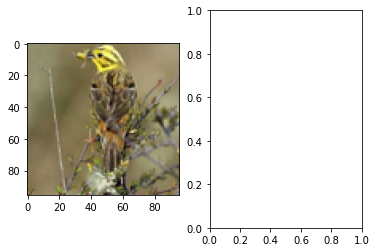

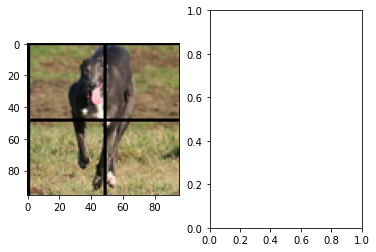

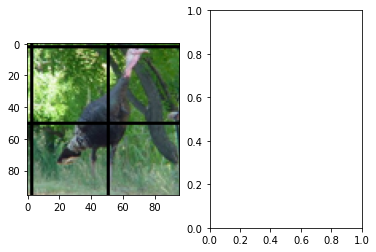

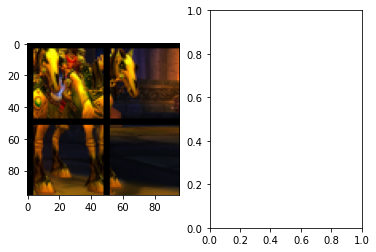

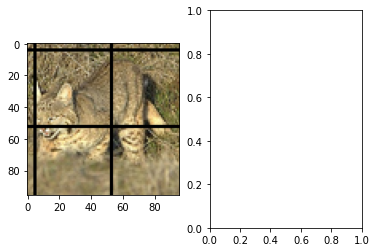

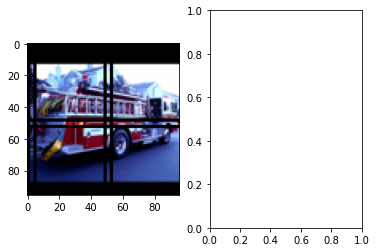

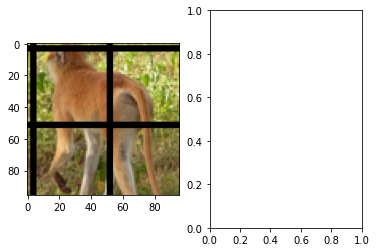

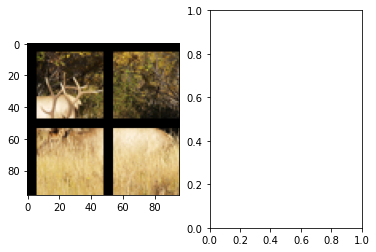

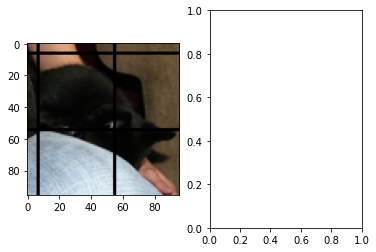

In [8]:
def gen_stamp(stamp, size=96, res=2, stride=48):
    N = len(stamp)
    mask = np.ones((size,size), dtype=np.float32)
    for s in range(0, size, stride):
        for i in range(N):
            mask[s+i*res: s+i*res+res, :] *= stamp[i]
            mask[:, s+i*res: s+i*res+res] *= stamp[i]
    return mask

def mask_image(image, mask, weight):
    one = np.ones_like(mask)
    tmp = (one * (1 - weight) + mask * weight)
    return (image.astype(float) * tmp[:,:,None]).astype(image.dtype)

cnt = 1
for x, y in ds:
#     mask = gen_stamp((np.random.rand(20) > 0.3).astype(int))
    x = np.asarray(x)
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(x)
#     ax[1].imshow(mask_image(x, mask, 0.5))
    
    cnt += 1
    if cnt == 10:
        break